# <center> ANÁLISE DE DADOS </center>
## <center> RECEITAS DE CERVEJA DO AMIGO CERVEJEIRO </center>

### <center>Ana Cláudia (1802) - Gustavo Graf (1283) - Kaio Igor (1760)</center>

## 1. Introdução
<br>
<div align="justify">Ao utilizar um conjunto de dados reais, há diversos impasses que dificultam sua visualização e extração de conhecimentos, pois, em grande maioria, há ruídos, erros e campos vazios. Este transtorno é notável, principalmente, quando as informações esperadas não são as mesmas descritas nos resultados. Desta forma, é necessário que seja feito uma série de procedimentos que facilite a representação desses dados, deixando-os de fácil visibilidade aos usuários comuns.</div>
<br>
<div align="justify">Na primeira parte do trabalho, foi o escolhido um conjunto de dados que será utilizado nas etapas seguintes, neste caso, o tema selecionado chama-se: Receitas de cerveja do amigo cervejeiro (em inglês, *Brewer's Friend Beer Recipes*). Na fase seguinte, a preparação dos dados, tem como objetivos : entender os atributos e objetos; tipos de atributos; domínio dos atributos; identificar ruídos ou informações ausentes; criar novos atributos; formatar valores; entre outros.</div> 

<div align="justify">A terceira etapa, ocorre a análise exploratória e extração de conhecimento, assim, será gerado estatísticas descritivas, gráficos e tabelas para conhecer os dados. Portanto, extrairá correlações entre atributos e objetos. E, por fim, executaremos um algoritmo de aprendizagem de máquina para classificar ou agrupas os dados, para analisar se há algum acontecimento desconhecido, realizando uma análise preditiva.</div>

## 2. Preparação dos dados
<br>
<div align="justify">O conjunto de dados *Brewer's Friend Beer Recipes* apresenta 75 mil cervejas produzidas em casa de 176 estilos diferentes. Os registros são feitos por alguns usuários e classificados de acordo com os estilos definidos.</div>

### 2.1. Atributos
<br>
Foram necessário importar algumas bibliotecas que realizarão a leitura dos dados e as manipulações necessárias, que possuem os seguintes objetivos:
 
 * **NumPy:** Pacote fundamental para manipulação de estruturas bidimensionais;
 * **Pandas:** Fornece ferramentas de análise de dados;
 * **Missingno:** Permite alguns módulos de visualização de dados;
 * **Matplotlib.pyplot:** Oferece estrutura de plotagem de gráficos semelhante ao MatLab;
 * **Sklearn:** Eficiente ferramentas para mineração de dados e análise de dados.

In [5]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import sklearn
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
#import plotly.plotly as py
#import plotly.graph_objs as go

In [6]:
df_beer = pd.read_csv('recipeData.csv', index_col='BeerID', encoding='latin1')

In [7]:
df_beer.columns

Index(['Name', 'URL', 'Style', 'StyleID', 'Size(L)', 'OG', 'FG', 'ABV', 'IBU',
       'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency',
       'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate', 'PrimaryTemp',
       'PrimingMethod', 'PrimingAmount', 'UserId'],
      dtype='object')

<div align="justify">Ao realizar a leitura do conjunto de dados, é possível analisar cada coluna da tabela. Para entender melhor o significado de cada uma, há uma tabela com os nomes de cada um e sua respectiva descrição.</div>

| Atributo        |Descrição do atributo|
| ------------- |:-------------:|
|**Name**|Nome da cerveja.|
|**URL**|Página que possui a receita.|
|**Style**|Tipo de fermentação.|
|**Style ID**|ID do tipo de fermentação.|
|**Size(L)**|Quantidade fabricada por receita.|
|**OG**|Quantidade antes da fermentação.|
|**FG**|Quantidade depois da fermentação.|
|**ABV**|Álcool por volume.|
|**IBU**|Unidade internacional de amargor.|
|**Color**|Cor da cerveja.|
|**BoilSize**|Fluido no início da fervura.|
|**BoilTime**|Tempo de fervimento.|
|**BoilGravity**|Quantidade antes da fervura.|
|**Efficiency**|Extração de açucares e grãos.|
|**MashThick**|Quantidade de água por quilo de grãos.|
|**SugarScale**|Quantidade de sólidos dissolvidos.|
|**BrewMethod**|Técnicas para sua fabricação.|
|**PitchRate**|Levedura adicionada ao fermentador.|
|**PrimaryTemp**|Temperatura durante fermentação.|
|**PrimingMethod**|Método para adição de açucares.|
|**PrimingAmount**|Quantidade de açucar usado.|
|**UserId**|ID do usuário.|

In [8]:
print(df_beer.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73861 entries, 1 to 73861
Columns: 22 entries, Name to UserId
dtypes: float64(13), int64(2), object(7)
memory usage: 13.0+ MB
None


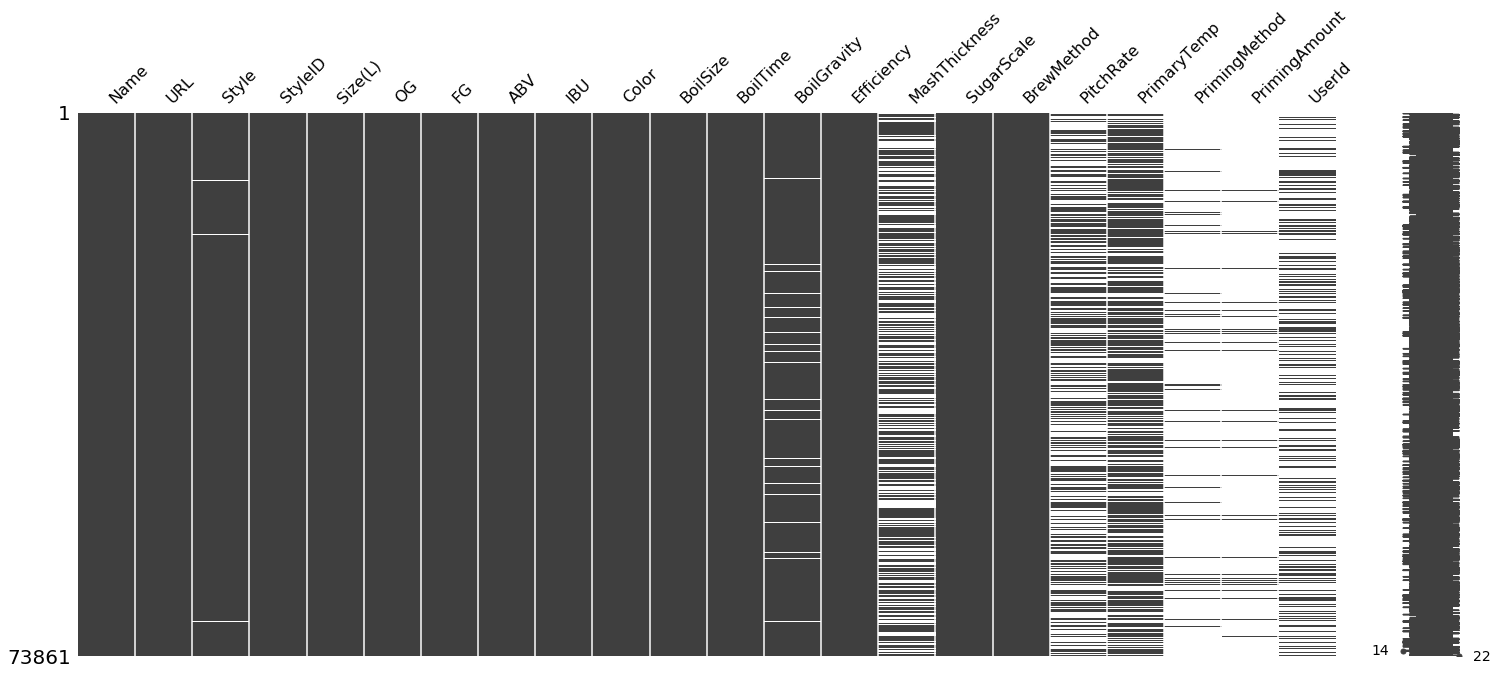

In [159]:
msno.matrix(df_beer.sample(len(df_beer)))

<div align="justify">Utilizando o Missingno, criou-se um gráﬁco que permite uma representação gráﬁca de valores nulos de cada coluna. Assim, como podemos ver no gráfico gerado acima, as colunas *PrimingMethod* e *PrimingAmount* possuem muitos valores nulos, mais de 90% dos casos. Isso se dá pois essas etapas na fabricação da cerveja trazem um diferencial para a mesmo. Portanto, alguns cervejeiros não forneceram esses campos, já que ambos não são obrigatórios.</div>

In [160]:
priming_nulo = df_beer['PrimingMethod'].isnull()
print('Priming Method é nulo em {} de {} linhas, ou seja, {} % do tempo.'.format(priming_nulo.sum(), len(df_beer), round((priming_nulo.sum()/len(df_beer))*100,2)))

Priming Method é nulo em 67095 de 73861 linhas, ou seja, 90.84 % do tempo.


In [9]:
primingA_nulo = df_beer['PrimingAmount'].isnull()
print('Priming Amount é nulo em {} de {} linhas, ou seja, {} % do tempo.'.format(primingA_nulo.sum(), len(df_beer), round((primingA_nulo.sum()/len(df_beer))*100,2)))

Priming Amount é nulo em 69087 de 73861 linhas, ou seja, 93.54 % do tempo.


In [161]:
df_beer.dtypes

Name              object
URL               object
Style             object
StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale        object
BrewMethod        object
PitchRate        float64
PrimaryTemp      float64
PrimingMethod     object
PrimingAmount     object
UserId           float64
dtype: object

In [162]:
df_beer['Size(L)'].describe()

count    73861.000000
mean        43.929775
std        180.373492
min          1.000000
25%         18.930000
50%         20.820000
75%         23.660000
max       9200.000000
Name: Size(L), dtype: float64

<div align="justify">Após a criação do gráfico de valores nulos, foi calculado a porcentagem de valores nulos presente em ambas colunas. Visto que, mais de 90% desses valores são nulos, estas colunas foram apagas, como mostra as duas linhas a seguir:</div>

In [163]:
df_beer.drop('PrimingMethod', inplace=True, axis=1)

In [164]:
df_beer.drop('PrimingAmount', inplace=True, axis=1)

In [165]:
#df_style = pd.read_csv('styleData.csv', index_col=False, encoding='latin1')
#msno.matrix(df_style.sample(176))

<div align="justify">A string NaN significa nulo, como exemplo, utilizamos a coluna *BoilGravity* para mostrar que não é necessário ser tratado.</div>

In [166]:
df_beer[df_beer['BoilGravity'].isnull()]

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,UserId
BeerID,,,,,,,,,,,,,,,,,,,,
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN
7,Russian River Pliny the Elder (original),/homebrew/recipe/view/37534/russian-river-plin...,Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,1051.0
12,Hop Notch Clone,/homebrew/recipe/view/10092/hop-notch-clone,American IPA,7,15.14,1.066,1.015,6.62,111.00,14.26,11.36,90,NaN,70.0,NaN,Specific Gravity,BIAB,NaN,NaN,NaN
13,Racer 5 IPA Clone,/homebrew/recipe/view/23246/racer-5-ipa-clone,American IPA,7,20.82,1.073,1.019,7.07,69.72,6.28,28.39,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN
16,Pilsner Urquell BYO clone,/homebrew/recipe/view/3000/pilsner-urquell-byo...,Bohemian Pilsener,31,41.64,1.051,1.013,4.92,36.80,3.61,49.21,60,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN
23,Brooklyn Sorachi Ace,/homebrew/recipe/view/190892/brooklyn-sorachi-ace,Saison,134,18.93,1.082,1.013,9.10,0.00,4.10,21.58,60,NaN,72.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN
26,Dale's Pale Ale Clone,/homebrew/recipe/view/190430/dale-s-pale-ale-c...,American Pale Ale,10,18.93,1.067,1.017,6.60,0.00,11.69,18.93,60,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN
32,Mosaic IPA,/homebrew/recipe/view/191545/mosaic-ipa,American IPA,7,18.93,1.074,1.018,7.24,0.00,7.68,22.71,60,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,35054.0


In [167]:
mt_nulo = df_beer['MashThickness'].isnull()
pr_nulo = df_beer['PitchRate'].isnull()

print('MashThickness é nulo em {} de {} linhas, ou seja, {} % do tempo.'.format(mt_nulo.sum(), len(df_beer), round((mt_nulo.sum()/len(df_beer))*100,2)))
print('\nPitchRate é nulo em {} de {} linhas, ou seja, {} % do tempo.'.format(pr_nulo.sum(), len(df_beer), round((pr_nulo.sum()/len(df_beer))*100,2)))

MashThickness é nulo em 29864 de 73861 linhas, ou seja, 40.43 % do tempo.

PitchRate é nulo em 39252 de 73861 linhas, ou seja, 53.14 % do tempo.


In [168]:
# df_beer[(df_beer['MashThickness'].isnull()) & (df_beer['PitchRate'].isnull()) & (df_beer['PrimaryTemp'].isnull()) & (df_beer['UserId'].isnull()) & (df_beer['BoilGravity'].isnull())]

In [169]:
df_beer = df_beer[df_beer['FG'] > 0]

<div align="justify">Analisando os atributos do Data Frame, percebemos que a quantidade de líquido antes do processo de fermentação da cerveja (OG) é menor que a quantidade resultante (FG).Pensando nesse aspecto, criamos um novo atributo, chamado *BrewLost*, que resume a diferença entre OG e FG. Com isso poderemos relacionar qual estilo tem uma maior perda nesse processo.O gráfico de valores nulos, utilizando o Missigno, é mostrado posteriormente, junto ao Data Frame com informações deste novo atributo</div>


In [170]:
df_beer['BrewLost'] = (df_beer['OG'] - df_beer['FG']) *100 / df_beer['OG']

In [171]:
df_beer.head(30)

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,UserId,BrewLost
BeerID,,,,,,,,,,,,,,,,,,,,,
1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,...,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,116.0,3.981043
2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,...,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,955.0,5.724838
3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,...,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,4.233302
4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,...,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,4.147031
5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,...,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,18325.0,4.716981
6,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,American Pale Ale,10,24.61,1.055,1.013,5.58,40.12,8.00,...,70,1.047,79.0,NaN,Specific Gravity,All Grain,1.00,NaN,5889.0,3.981043
7,Russian River Pliny the Elder (original),/homebrew/recipe/view/37534/russian-river-plin...,Imperial IPA,86,22.71,1.072,1.018,7.09,268.71,6.33,...,90,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN,1051.0,5.037313
8,Spotted Clown (New Glarus Spotted Cow clone),/homebrew/recipe/view/672/spotted-clown-new-gl...,Cream Ale,45,20.82,1.054,1.014,5.36,19.97,5.94,...,75,1.040,70.0,1.40,Specific Gravity,All Grain,NaN,NaN,116.0,3.795066
9,Chocolate Vanilla Porter,/homebrew/recipe/view/29265/chocolate-vanilla-...,Robust Porter,129,22.71,1.060,1.016,5.77,31.63,34.76,...,75,1.042,73.0,NaN,Specific Gravity,All Grain,NaN,NaN,116.0,4.150943


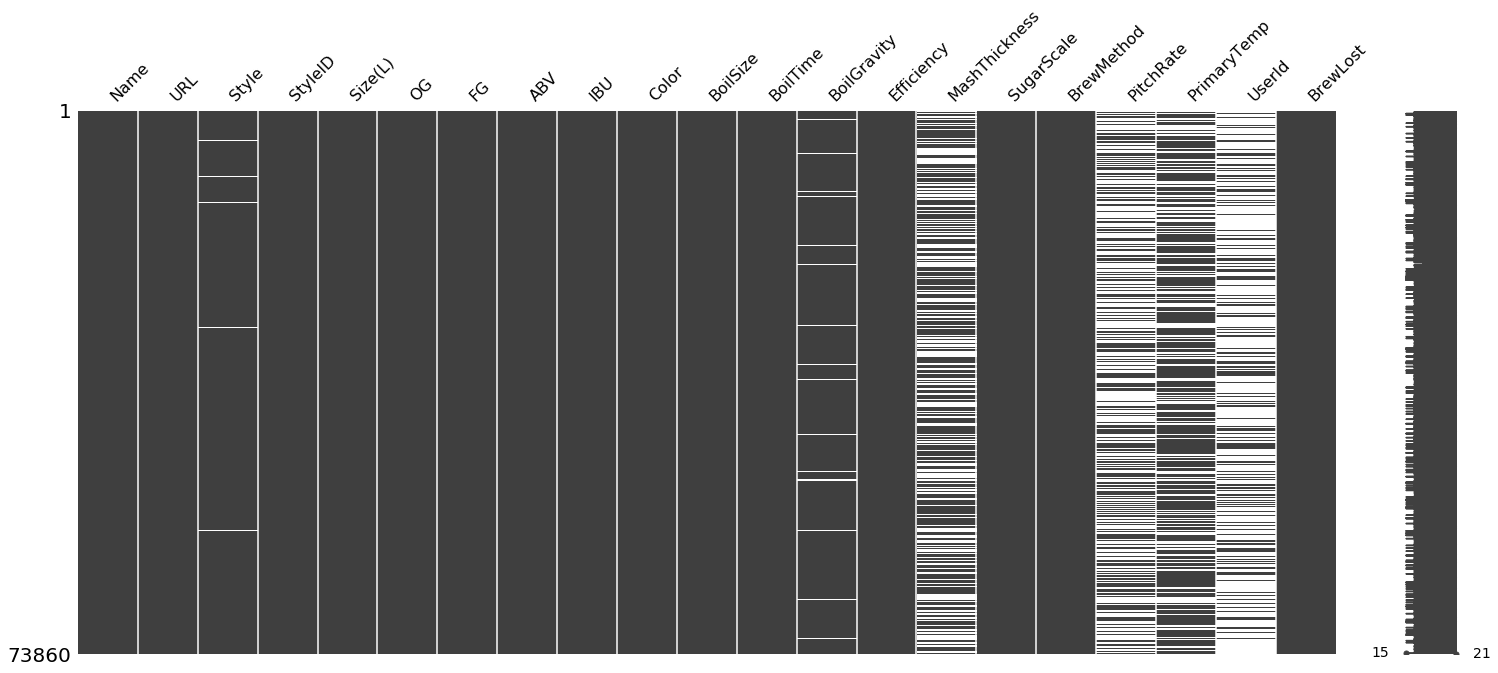

In [172]:
msno.matrix(df_beer.sample(len(df_beer)))

A partir deste gráfico de valores nulos, é possível ver que há um estilo nulo. Como este é um atributo importante para as análises que serão feitas, serão apagados objetos referentes a esse estilo.

In [173]:
df_beer[df_beer['StyleID'] == 111]

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,UserId,BrewLost
BeerID,,,,,,,,,,,,,,,,,,,,,
39,Rochefort 8 Clone,/homebrew/recipe/view/188995/rochefort-8-clone,NaN,111,18.93,1.079,1.019,7.90,0.00,29.40,...,60,NaN,65.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,5.560704
88,Zatarain's Root Beer - Non-Alcoholic keg in...,/homebrew/recipe/view/21783/zatarain-s-root-be...,NaN,111,18.93,1.046,1.013,4.27,0.00,3.99,...,0,1.077,100.0,NaN,Specific Gravity,BIAB,NaN,NaN,993.0,3.154876
193,Hop Cliff,/homebrew/recipe/view/188896/hop-cliff,NaN,111,18.93,1.093,1.023,9.12,0.00,14.07,...,60,NaN,75.0,NaN,Specific Gravity,Partial Mash,NaN,NaN,NaN,6.404392
348,Mosaic IPL,/homebrew/recipe/view/56751/mosaic-ipl,NaN,111,20.82,1.063,1.016,6.16,68.35,7.67,...,60,NaN,78.0,NaN,Specific Gravity,All Grain,2.00,10.00,15452.0,4.421449
578,Nanny state,/homebrew/recipe/view/329814/nanny-state,NaN,111,20.00,1.008,1.006,0.30,55.43,11.39,...,60,1.006,70.0,3.00,Specific Gravity,All Grain,NaN,NaN,3053.0,0.198413
817,New world XII (westvleteren 12 clone),/homebrew/recipe/view/47720/new-world-xii-west...,NaN,111,20.82,1.105,1.024,10.67,49.40,25.37,...,90,NaN,75.0,NaN,Specific Gravity,All Grain,1.00,27.78,13634.0,7.330317
945,Australian IPA,/homebrew/recipe/view/10443/australian-ipa,NaN,111,18.93,1.053,1.015,5.05,46.43,9.92,...,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,651.0,3.608737
1003,Maris Otter sMasH,/homebrew/recipe/view/52974/maris-otter-smash,NaN,111,23.00,1.048,1.014,4.56,31.09,5.56,...,90,NaN,70.0,NaN,Specific Gravity,BIAB,NaN,20.00,14727.0,3.244275
1108,Quilter's Irish Death Clone,/homebrew/recipe/view/191213/quilter-s-irish-d...,NaN,111,18.93,1.071,1.018,6.93,0.00,18.67,...,60,NaN,75.0,1.25,Specific Gravity,All Grain,NaN,NaN,NaN,4.948646


In [174]:
df_beer[df_beer['Style'].isnull()]

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,UserId,BrewLost
BeerID,,,,,,,,,,,,,,,,,,,,,
39,Rochefort 8 Clone,/homebrew/recipe/view/188995/rochefort-8-clone,NaN,111,18.93,1.079,1.019,7.90,0.00,29.40,...,60,NaN,65.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,5.560704
88,Zatarain's Root Beer - Non-Alcoholic keg in...,/homebrew/recipe/view/21783/zatarain-s-root-be...,NaN,111,18.93,1.046,1.013,4.27,0.00,3.99,...,0,1.077,100.0,NaN,Specific Gravity,BIAB,NaN,NaN,993.0,3.154876
193,Hop Cliff,/homebrew/recipe/view/188896/hop-cliff,NaN,111,18.93,1.093,1.023,9.12,0.00,14.07,...,60,NaN,75.0,NaN,Specific Gravity,Partial Mash,NaN,NaN,NaN,6.404392
348,Mosaic IPL,/homebrew/recipe/view/56751/mosaic-ipl,NaN,111,20.82,1.063,1.016,6.16,68.35,7.67,...,60,NaN,78.0,NaN,Specific Gravity,All Grain,2.00,10.00,15452.0,4.421449
578,Nanny state,/homebrew/recipe/view/329814/nanny-state,NaN,111,20.00,1.008,1.006,0.30,55.43,11.39,...,60,1.006,70.0,3.00,Specific Gravity,All Grain,NaN,NaN,3053.0,0.198413
817,New world XII (westvleteren 12 clone),/homebrew/recipe/view/47720/new-world-xii-west...,NaN,111,20.82,1.105,1.024,10.67,49.40,25.37,...,90,NaN,75.0,NaN,Specific Gravity,All Grain,1.00,27.78,13634.0,7.330317
945,Australian IPA,/homebrew/recipe/view/10443/australian-ipa,NaN,111,18.93,1.053,1.015,5.05,46.43,9.92,...,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,651.0,3.608737
1003,Maris Otter sMasH,/homebrew/recipe/view/52974/maris-otter-smash,NaN,111,23.00,1.048,1.014,4.56,31.09,5.56,...,90,NaN,70.0,NaN,Specific Gravity,BIAB,NaN,20.00,14727.0,3.244275
1108,Quilter's Irish Death Clone,/homebrew/recipe/view/191213/quilter-s-irish-d...,NaN,111,18.93,1.071,1.018,6.93,0.00,18.67,...,60,NaN,75.0,1.25,Specific Gravity,All Grain,NaN,NaN,NaN,4.948646


In [175]:
df_beer.dropna(axis=0, subset=['Style'], inplace=True)

Similar ao *Style* nulo, foi analisado 5 objetos do Data Frame, apresentavam o valor "???" no campo *Name*. Por isso, também foram deletá-los.

In [176]:
df_beer[df_beer['Name'] == '???']

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,UserId,BrewLost
BeerID,,,,,,,,,,,,,,,,,,,,,
6404,???,/homebrew/recipe/view/310174/-,American IPA,7,11.0,1.061,1.012,6.37,68.59,7.39,...,60,1.037,70.0,NaN,Specific Gravity,BIAB,NaN,19.0,39818.0,4.618285
9113,???,/homebrew/recipe/view/473225/-,English Porter,66,300.0,1.051,1.012,5.14,31.91,29.25,...,60,1.046,68.0,2.5,Specific Gravity,All Grain,0.35,19.0,NaN,3.710752
24931,???,/homebrew/recipe/view/481944/-,Saison,134,20.0,1.054,1.012,5.53,36.04,3.92,...,60,1.045,68.0,2.5,Specific Gravity,All Grain,0.35,23.0,NaN,3.984820
66453,???,/homebrew/recipe/view/579601/-,Weizen/Weissbier,170,20.0,1.047,1.012,4.64,9.56,4.17,...,60,1.038,68.0,4.0,Specific Gravity,All Grain,NaN,NaN,NaN,3.342884
73228,???,/homebrew/recipe/view/618449/-,Märzen,102,105.0,1.055,1.009,5.98,27.04,8.58,...,60,1.050,73.0,3.5,Specific Gravity,All Grain,2.00,15.0,1836.0,4.360190


In [177]:
df_beer = df_beer[df_beer['Name'] != '???']
df_beer[df_beer['Name'] == '???']

,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,UserId,BrewLost
BeerID,,,,,,,,,,,,,,,,,,,,,


<b>Com o intuito de verificar qual Estilo de cerveja possui mais cervejas, no data frame, realizamos um agrupamento dos dados por estilos. Assim, obtivemos como estilo mais populoso o American IPA.</b>

In [178]:
dfStyle = df_beer.groupby('Style')
dfStyle['Name'].count().sort_values(ascending = False).head(20)

Style
American IPA              11939
American Pale Ale          7581
Saison                     2616
American Light Lager       2277
American Amber Ale         2038
Blonde Ale                 1752
Imperial IPA               1478
American Stout             1268
Irish Red Ale              1204
American Brown Ale         1152
Witbier                    1072
California Common Beer     1044
Weissbier                   988
Oatmeal Stout               961
Russian Imperial Stout      929
Sweet Stout                 919
Weizen/Weissbier            918
Robust Porter               897
Kölsch                      869
Double IPA                  864
Name: Name, dtype: int64

<b>Para melhor vizualização da representação do ABV, por média das cervejas de cada estilo, foi utilizado um gráfico de barras com 50 estilos aleatórios.</b>

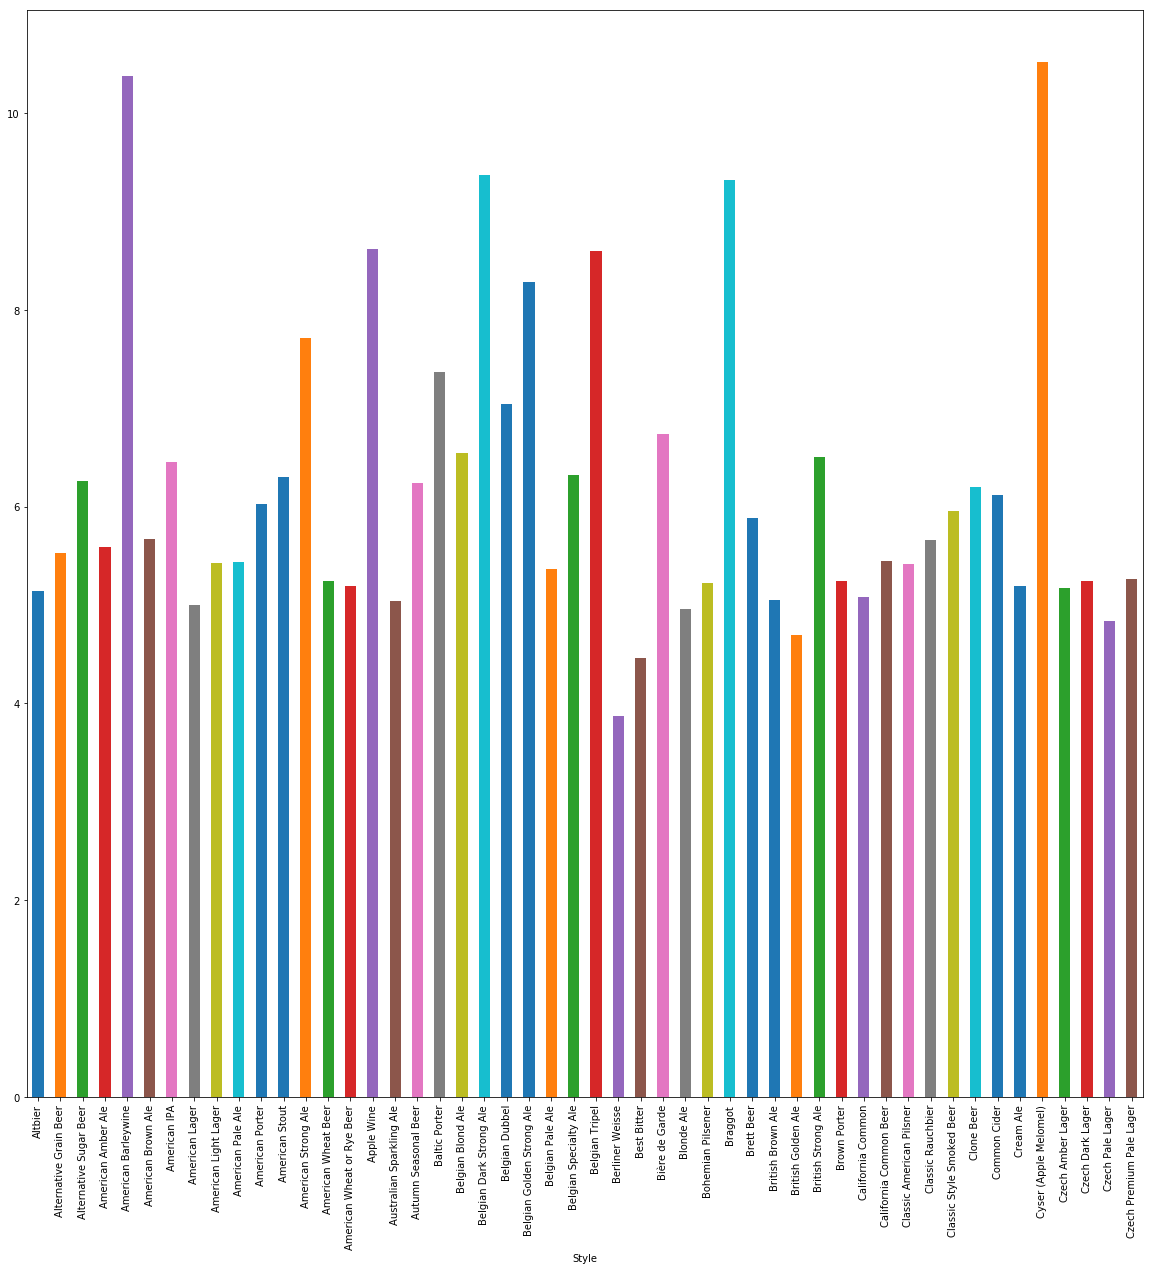

In [194]:
dfStyle_mediana = dfStyle.median()
dfStyle_mediana.iloc[0:50]['ABV'].plot(kind='bar', figsize = (20,20))
plt.show()

<b>A seguir mostramos a média dos teores alcóolicos por estilo, ordenando-os de forma decrescente.</b>

In [195]:
dfStyle['ABV'].median().sort_values(ascending = False).head(30)

Style
Metheglin                         13.350
Semi-Sweet Mead                   12.750
Sweet Mead                        12.610
Other Fruit Melomel               11.970
Pyment (Grape Melomel)            11.470
Dry Mead                          11.430
Cyser (Apple Melomel)             10.520
American Barleywine               10.370
English Barleywine                10.300
Wheatwine                         10.210
Russian Imperial Stout             9.680
Imperial Stout                     9.670
Belgian Dark Strong Ale            9.370
Braggot                            9.320
Eisbock                            9.090
Open Category Mead                 8.870
Apple Wine                         8.620
Belgian Tripel                     8.600
Wood-Aged Beer                     8.510
Wee Heavy                          8.480
Belgian Golden Strong Ale          8.280
Double IPA                         8.220
Imperial IPA                       8.215
Strong Scotch Ale                  8.120
Doppelbock

<b>Foi calculada também a média dos valores da pigmentação das cores por estilo, ordenando-os de forma decrescente.</b>

In [196]:
dfStyle['Color'].median().sort_values(ascending = False).head(30)

Style
Imperial Stout              50.000
Russian Imperial Stout      44.520
Foreign Extra Stout         39.625
American Stout              39.295
Sweet Stout                 38.980
Tropical Stout              38.620
Dry Stout                   36.495
Oatmeal Stout               36.330
Irish Extra Stout           35.950
Irish Stout                 35.790
American Porter             34.890
Robust Porter               34.070
Specialty IPA: Black IPA    34.065
Baltic Porter               30.930
English Porter              28.360
Brown Porter                28.320
Pre-Prohibition Porter      27.680
Specialty Wood-Aged Beer    27.170
Schwarzbier                 26.550
London Brown Ale            23.750
Southern English Brown      23.310
Czech Dark Lager            23.050
American Brown Ale          22.935
Belgian Dark Strong Ale     22.525
Wood-Aged Beer              22.450
Winter Seasonal Beer        21.630
Other Smoked Beer           20.940
Strong Scotch Ale           20.725
Oud Bruin     

<b>Foi calculada também a média dos valores do amargor por estilo, ordenando-os de forma decrescente.</b>

In [197]:
dfStyle['IBU'].median().sort_values(ascending = False).head(30)

Style
Imperial IPA                         103.815
Double IPA                            97.175
American Barleywine                   92.590
Russian Imperial Stout                73.540
Specialty IPA: Black IPA              73.300
American Strong Ale                   72.200
Specialty IPA: Belgian IPA            71.690
Imperial Stout                        71.030
Specialty IPA: Rye IPA                66.875
American IPA                          64.950
Specialty IPA: Brown IPA              62.900
Specialty IPA: Red IPA                62.700
English Barleywine                    61.340
Specialty IPA: White IPA              57.630
English IPA                           53.495
Wheatwine                             53.180
Foreign Extra Stout                   47.315
American Stout                        46.170
Old Ale                               45.620
Wood-Aged Beer                        45.070
British Strong Ale                    43.040
Dusseldorf Altbier                    41.375
Iris

<b>Com base nos calculos de médias estipulamos os valores: Maior que 20 para pigmentações mais escuras; Teor alcóolico(ABV) maior que 4,5% como bebidas fortes; Amargor(IBU) maior que 40 para cervejas amargas.</b>

In [182]:
cor_ABV = len(df_beer[(df_beer['Color'] > 20.0) & (df_beer['ABV'] > 4.5)])
cor = len(df_beer[(df_beer['Color'] > 20.0)])

print((cor_ABV/cor)*100, "%  das cervejas com coloração escura, possuem teor alcólico maior que as cervejas convecionais(ABV > 4.5%)")

93.36129977360501 %  das cervejas com coloração escura, possuem teor alcólico maior que as cervejas convecionais(ABV > 4.5%)


In [184]:
IBU_ABV = len(df_beer[(df_beer['IBU'] > 40.0) & (df_beer['ABV'] > 4.5)])
IBU = len(df_beer[(df_beer['IBU'] > 40.0)])

print((IBU_ABV/IBU)*100, "%  das cervejas com alto amargor, possuem alto teor alcólico(IBU > 40)")

95.89863074909833 %  das cervejas com alto amargor, possuem alto teor alcólico(IBU > 40)


In [185]:
cor_ABV = len(df_beer[(df_beer['Color'] > 20.0) & (df_beer['IBU'] > 40.0)])
cor = len(df_beer[(df_beer['Color'] > 20.0)])

print((cor_ABV/cor)*100, "%  das cervejas com coloração escura, possuem alto amargor(Color > 20)")

45.591956319083764 %  das cervejas com coloração escura, possuem alto amargor(Color > 20)


<b>Utilizando a coluna criada por nós, BrewLost, calculamos a porcentagem de cervejas com perdas significante após o processo de fermentação.</b>

In [186]:
lowPerda = len(df_beer[(df_beer['BrewLost'] < 10.0)])
print(lowPerda * 100 / (len(df_beer['BrewLost'])),"% das cervejas possuem uma perda insignificante depois da fermentação(BrewLost < 10%).")

97.1689485250959 % das cervejas possuem uma perda insignificante depois da fermentação(BrewLost < 10%).


<b>O gráfico do tipo </b><i><b>plotbox</b></i><b> abaixo, representa a porcentagem de perca, por cerveja, após o processo de fermentação.</b>

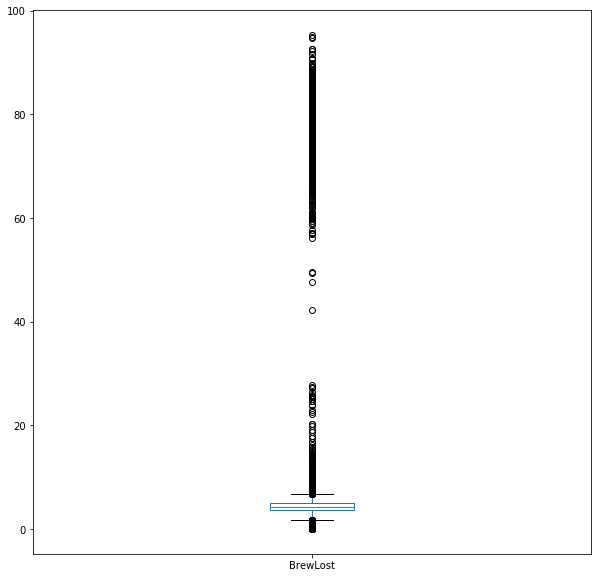

In [187]:
#Boxplot das perdas após fermentação
df_beer['BrewLost'].plot.box(figsize = (10,10))
plt.show()

<b>Com o intuito de analisar qual estilo de cerveja possui maior perda, foi realizida uma análise de forma a exibir os cinco estilos com maior perda no processo de fermentação.</b>

In [188]:
dfStyle['BrewLost'].max().sort_values(ascending = False).head(5)
#Esses estilos de cerveja possuem a maior perda media, entre todas cerveja do estilo

Style
Mixed-Fermentation Sour Beer    95.317967
Saison                          94.832382
American Light Lager            94.781232
Blonde Ale                      92.688663
Mixed-Style Beer                90.800267
Name: BrewLost, dtype: float64

<b>Para futuras predições, plotamos gráficos de regressões lineares para 10 atributos do estilo </b><i><b>American IPA</b></i>. <b>Assim poderemos analisar as equações obtidas a partir das regressões.</b>

/home/kaio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3e459f2b0>,
      dtype=object)

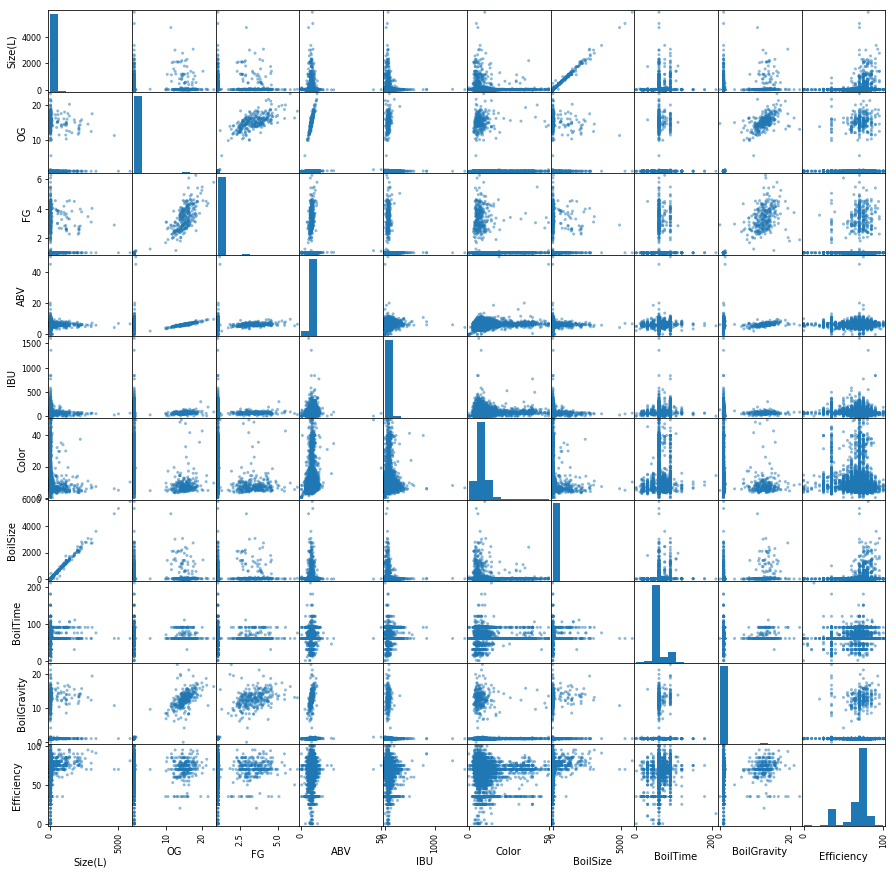

In [193]:
df_AmericanIPA = df_beer[df_beer['Style'] == "American IPA"]
pd.scatter_matrix(df_AmericanIPA.loc[:,'Size(L)':'Efficiency'], figsize = (15,15))